In [12]:
from 工具 import *
import matplotlib.pyplot as plt;import matplotlib.font_manager
碼表 = pd.read_excel('碼表.xlsx', '正表')

/media/yyr/DATA/anaconda3/envs/迩原/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12285 (\u2ffd) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/yyr/DATA/anaconda3/envs/迩原/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 202118 (\U00031586) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/yyr/DATA/anaconda3/envs/迩原/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 201592 (\U00031378) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/yyr/DATA/anaconda3/envs/迩原/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 202132 (\U00031594) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/yyr/DATA/anaconda3/envs/迩原/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12284 (\u2ffc) missing from current font.
  fig.canvas.print_figure(bytes_io, *

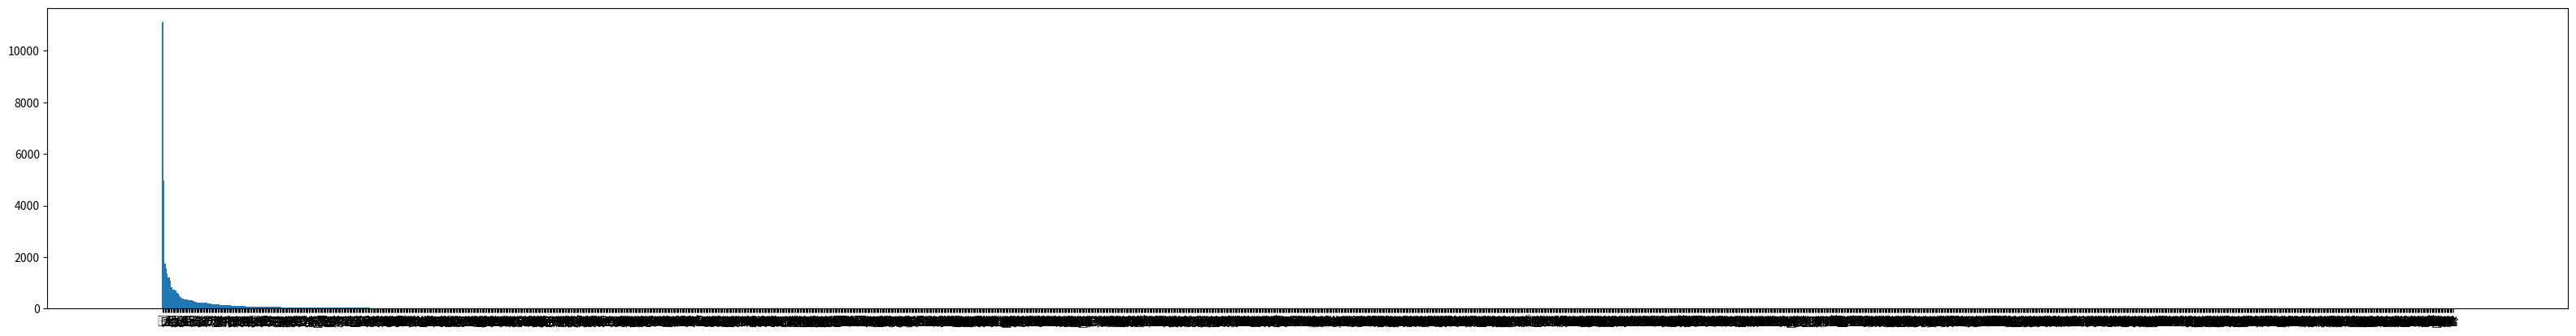

In [13]:
# 統計
plt.rcParams["font.family"] = "Noto Sans CJK JP", "KaiXinSongB"
# 式 = '⿳⿳⿰甲乙丙丁戊己';檢構字式(式)
碼表.fillna('',inplace=True)
所有構件 = 碼表['迩原正解'].str.cat(sep='') + 碼表['迩原或解'].astype(str).str.cat(sep='') + 碼表['迩原別解'].astype(str).str.cat(sep='') + 碼表['迩原又解'].astype(str).str.cat(sep='')
計 = Counter(所有構件)
plt.figure(dpi=100).set_figwidth(40)
plt.bar(*zip(*計.most_common()), width=1)
plt.show()
# plt.figure().get_dpi()
# 系統字型列 = matplotlib.font_manager.findSystemFonts(fontpaths=None)# https://matplotlib.org/stable/api/font_manager_api.html
# 字型列 = matplotlib.font_manager.get_font_names()
# matplotlib.font_manager.FontProperties('YeMing').get_name()
# print(系統字型列)

In [14]:
碼表排序 = 碼表.sort_values(by='漢字', axis=0)
碼表排序["文或字"] = 碼表排序["漢字"].apply(lambda z: ord(z))
碼表排序.loc[碼表排序["漢字"]==碼表排序["迩原正解"], "文或字"] = 0
碼表排序 = 碼表排序.sort_values(by=['漢字'], axis=0, key=攏)
# 碼表排序 = 碼表排序.sort_values(by=['迩原正解'], axis=0, key=依構件排序)
碼表排序 = 碼表排序.sort_values(by='文或字', axis=0)
# 碼表排序 = 碼表排序.sort_values(by=['備註'], axis=0, key=依備註排序)
碼表排序.drop(columns=['Unnamed: 0','文或字'], inplace=True)
碼表排序

,碼位,漢字,迩原正解,迩原或解,迩原別解,迩原又解,字通解字,六書,說文整理番號,備註,表頭意義參見：http://kanji-database.sourceforge.net/ids/ids-analysis.html,无名: 12,无名: 13
342,U+229AB,𢦫,𢦫,,,,,,,,,,
5,U+58EC,壬,壬,,,,壬,象形,5230010,,,,
6,U+58F0,声,声,,,,声,象形,,,,,
7,U+58F4,壴,壴,,,,→𧯛,,1600010,,,,
8,U+58FA,壺,壺,,,,壺,象形,3950010,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74614,U+2B81A,𫠚,,,,,,,,,,,
74615,U+2B81B,𫠛,,,,,,,,,,,
74616,U+2B81C,𫠜,,,,,→齯,共產,,,,,
74617,U+2B81D,𫠝,,,,,,,,,,,


In [15]:
# 碼表排序.to_excel('碼表.xlsx', '正表', freeze_panes=(1,0))

In [16]:
未列字 = [];有字无解 = []
def 窮解(構字式:str, 全表:pd.DataFrame):
	窮式 = ''
	for 字幹 in 構字式:
		if ord(字幹) < 0x3000 or (ord(字幹) >= 0xff00 and ord(字幹) < 0xfff0):
			窮式 += 字幹
			continue
		窮字幹 = 全表.loc[全表["漢字"]==字幹, "迩原正解"]
		if len(窮字幹) < 1:
			未列字.append(字幹)
			窮式 += 字幹;continue
		窮字幹 = 窮字幹.item()
		if 窮字幹 == '':
			有字无解.append(字幹)
			窮式 += 字幹
		else:
			窮式 += 窮字幹
	return 窮式
# 碼表排序[碼表排序.duplicated('漢字', False)]
窮一 = 碼表排序["迩原正解"]
碼表排序["迩原正解窮"] = 碼表排序["迩原正解"].apply(lambda x: 窮解(x, 碼表排序))
計數 = 0
while (碼表排序["迩原正解窮"] != 窮一).any() and 計數 < 10:
	異條 = 碼表排序["迩原正解窮"] != 窮一
	窮一 = 碼表排序["迩原正解窮"]
	碼表排序.loc[異條, "迩原正解窮"] = 碼表排序.loc[異條, "迩原正解窮"].apply(lambda x: 窮解(x, 碼表排序))
	計數 += 1
未列字 = list(set(未列字));有字无解 = list(set(有字无解))
未列字數 = len(未列字);无解字數 = len(有字无解)
if 未列字數 > 0:
    print(f'此 {未列字數} 字未列：{"、".join(未列字)}。')
if 无解字數 > 0:
    print(f'此 {无解字數} 字无正解：{"、".join(有字无解)}。')
if 未列字數 > 0 or 无解字數 > 0:
    print(f'請補齊上述 {未列字數+无解字數} 字後再運行。')
else:
    print('蕆。')
差異 = 碼表排序["迩原正解"].compare(碼表排序["迩原正解窮"], result_names=('字幹式','文式'))
print('攺了',str(len(差異)),'條：')
差異

此 23 字无正解：㕚、除、虔、越、窖、翰、預、穿、顯、窒、虹、阞、衍、軒、辥、過、芮、翌、蟲、賢、靜、粵、㱅。
請補齊上述 23 字後再運行。
攺了 6333 條：


,字幹式,文式
21038,喜,⿱壴口
21135,俁,⿰人⿱口夨
21279,⿸厂⿰炎刀,⿸厂⿰⿱火火刀
21381,⿰⿱歺谷又,⿰⿱歺⿱𠔁口又
21407,咅,⿳一不口
...,...,...
62399,⿱合酉,⿱⿱亼口酉
62689,⿱父金,⿱⿽丿又金
64505,⿰⿲人匕𡿨雚,⿰⿲人匕𡿨T⿱𦫳隹口口
65369,⿰韋⿰⿱一⿸丆⿱一一殳,⿰⿳夂囗㐄⿰⿱一⿸丆⿱一一殳
